In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_excel('/content/Manually-labelled_APRIL25_APRIL30.xlsx')
df

,created_on,Consumption,Status
0,"Mon, 25 Apr 2022 00:03:45 GMT",2,Normal
1,"Mon, 25 Apr 2022 00:10:47 GMT",21,Normal
2,"Mon, 25 Apr 2022 00:13:46 GMT",1,Normal
3,"Mon, 25 Apr 2022 00:18:46 GMT",2,Normal
4,"Mon, 25 Apr 2022 00:23:45 GMT",0,Normal
...,...,...,...
1689,"Sat, 30 Apr 2022 23:40:52 GMT",0,Normal
1690,"Sat, 30 Apr 2022 23:43:47 GMT",0,Normal
1691,"Sat, 30 Apr 2022 23:48:46 GMT",208,Normal
1692,"Sat, 30 Apr 2022 23:53:46 GMT",238,Normal


Summary Statistics:
       Consumption
count  1694.000000
mean    217.219599
std     249.218341
min       0.000000
25%       7.000000
50%      98.500000
75%     459.000000
max    1725.000000


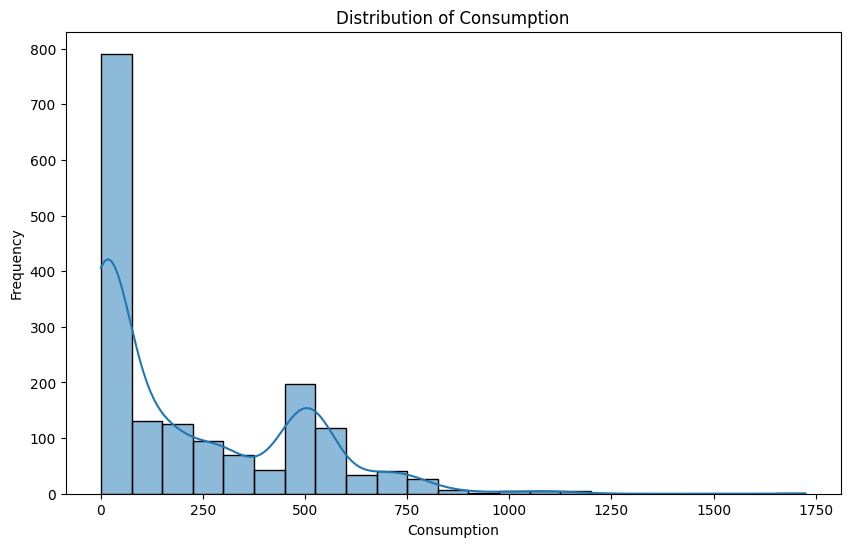

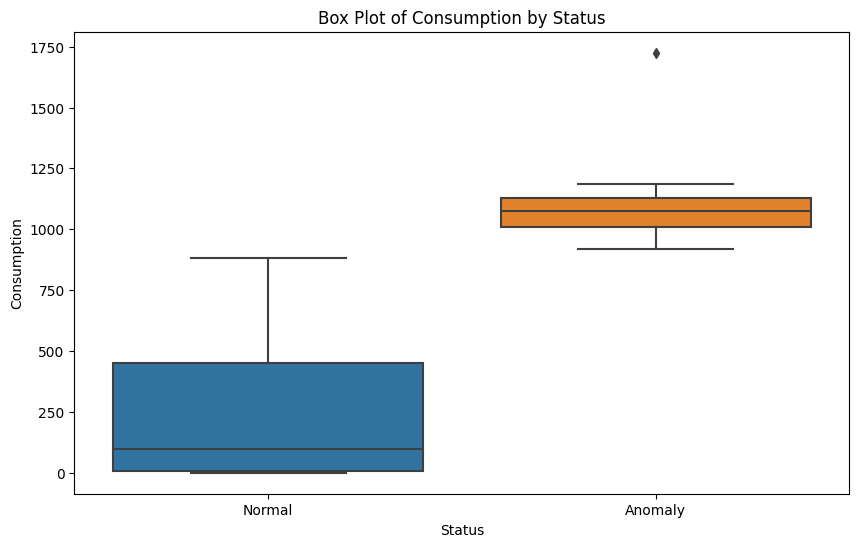

<ipython-input-7-6bcbd067a667>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


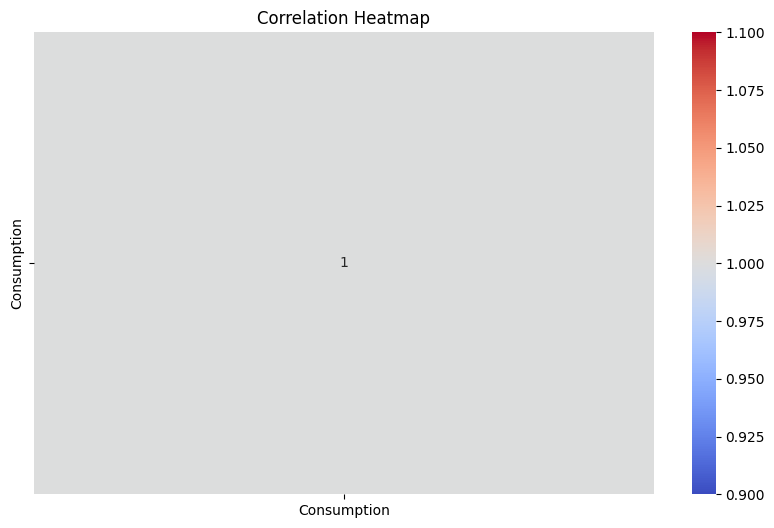

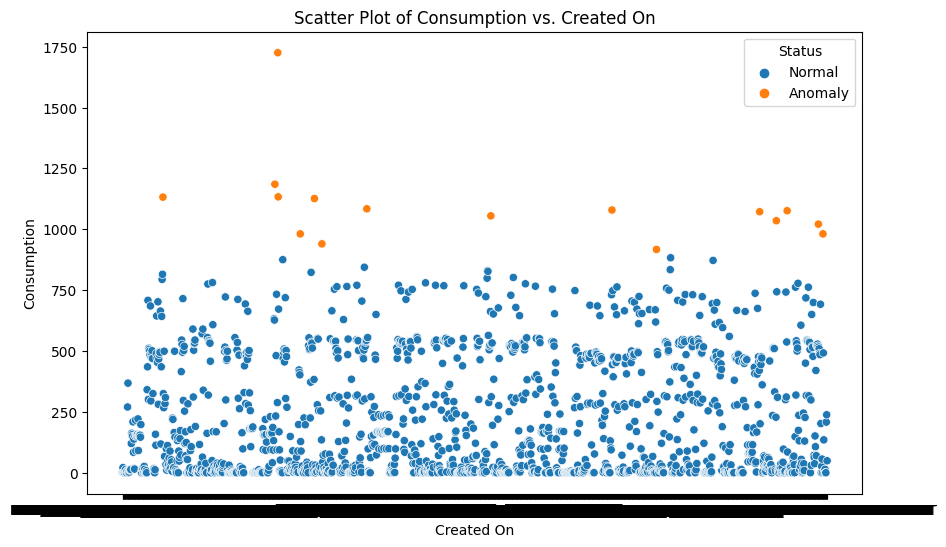

In [ ]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Consumption'], kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

# Box plot of Consumption by Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Consumption', data=df)
plt.title('Box Plot of Consumption by Status')
plt.xlabel('Status')
plt.ylabel('Consumption')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of Consumption vs. Created On
plt.figure(figsize=(10, 6))
sns.scatterplot(x='created_on', y='Consumption', hue='Status', data=df)
plt.title('Scatter Plot of Consumption vs. Created On')
plt.xlabel('Created On')
plt.ylabel('Consumption')
plt.show()

In [ ]:
# Count the number of Normal and Anomaly values in the Status column
status_counts = df['Status'].value_counts()
normal_count = status_counts['Normal']
anomaly_count = status_counts['Anomaly']
print('Number of Normal records:', normal_count)
print('Number of Anomaly records:', anomaly_count)


Number of Normal records: 1678
Number of Anomaly records: 16


In [ ]:
# Calculate the average and standard deviation of the Consumption column
consumption_average = df['Consumption'].mean()
consumption_std = df['Consumption'].std()
print('Average Consumption:', consumption_average)
print('Standard Deviation of Consumption:', consumption_std)

Average Consumption: 217.21959858323495
Standard Deviation of Consumption: 249.21834129082745


In [ ]:
# Filter out the Anomaly records
filtered_df = df[df['Status'] != 'Anomaly']

# Calculate the average and standard deviation of the Consumption column in the filtered data
consumption_average = filtered_df['Consumption'].mean()
consumption_std = filtered_df['Consumption'].std()

print('Average Consumption (filtered):', consumption_average)
print('Standard Deviation of Consumption (filtered):', consumption_std)

Average Consumption (filtered): 208.8367103694875
Standard Deviation of Consumption (filtered): 234.43168604005587


In [ ]:
# Load the dataset
df1 = pd.read_excel('/content/TIRUMALA_GRANULAR_DATA+_APRIL16_APRIL24.xlsx')
df1

,created_on,Consumption
0,"Sat, 16 Apr 2022 00:03:40 GMT",4.0
1,"Sat, 16 Apr 2022 00:10:44 GMT",13.0
2,"Sat, 16 Apr 2022 00:13:41 GMT",0.0
3,"Sat, 16 Apr 2022 00:18:40 GMT",12.0
4,"Sat, 16 Apr 2022 00:23:42 GMT",0.0
...,...,...
2526,"Sun, 24 Apr 2022 23:40:47 GMT",743.0
2527,"Sun, 24 Apr 2022 23:43:44 GMT",108.0
2528,"Sun, 24 Apr 2022 23:48:46 GMT",6.0
2529,"Sun, 24 Apr 2022 23:53:44 GMT",8.0


In [ ]:
df1.shape

(2531, 2)

In [ ]:
# Keep the first 1694 rows and drop the rest
df1 = df1.head(1694)

In [ ]:
df1['created_on'] = pd.to_datetime(df1['created_on'], format='%a, %d %b %Y %H:%M:%S %Z').dt.strftime('%Y-%m-%d %H:%M:%S+00:00')


<ipython-input-14-3f48c67d619a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['created_on'] = pd.to_datetime(df1['created_on'], format='%a, %d %b %Y %H:%M:%S %Z').dt.strftime('%Y-%m-%d %H:%M:%S+00:00')


In [ ]:
df1.shape

(1694, 2)

# **SIMPLE MOVING AVERAGE**

# WINDOW SIZE = **2**

<ipython-input-16-183946e09ada>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[ma > threshold, 'Status_pred'] = 'Anomaly'
<ipython-input-16-183946e09ada>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status_pred'].fillna('Normal',inplace=True)


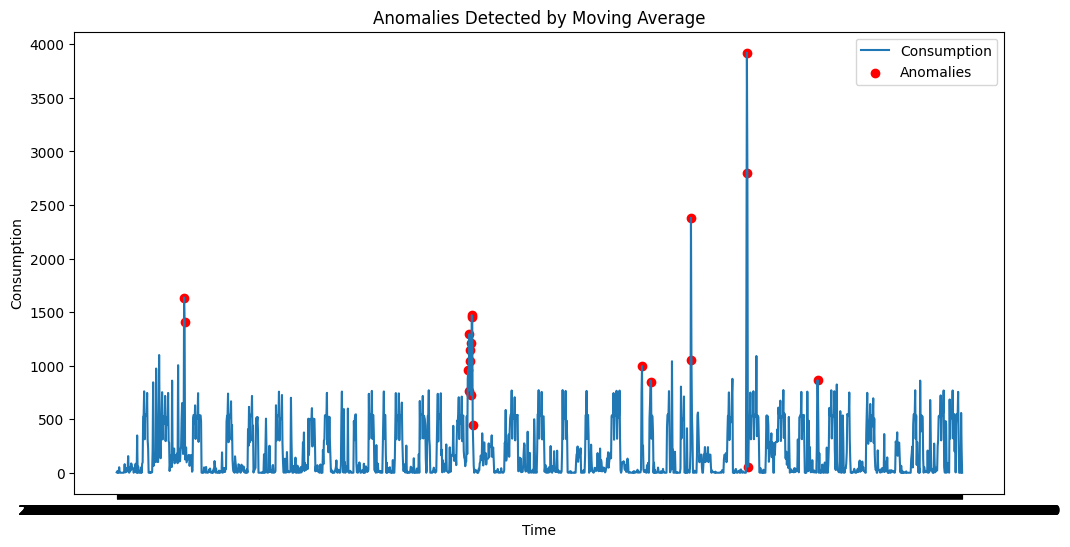

Normal     1674
Anomaly      20
Name: Status_pred, dtype: int64


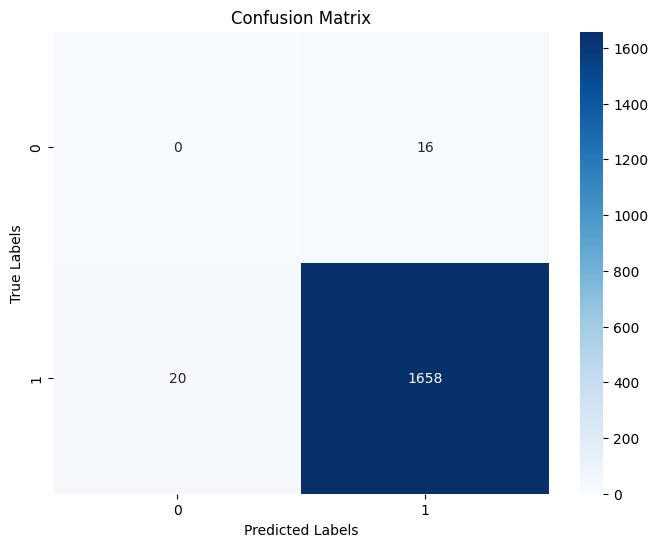

Accuracy Score: 0.9787485242030697
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


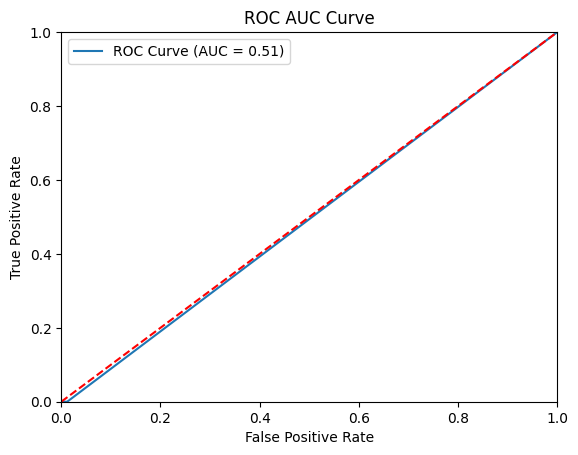

In [ ]:

# Calculate the average and standard deviation of the Consumption column
average = df1['Consumption'].mean()
std_deviation = df1['Consumption'].std()

# Calculate the window size based on the standard deviation and desired threshold
window_size = 2

# Calculate the moving average of the water readings
ma = df1['Consumption'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df1['Consumption'] - ma

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Update the 'Status' column based on the threshold
df1.loc[ma > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[ma <= threshold, 'Status_pred'] = 'Normal'
df1['Status_pred'].fillna('Normal',inplace=True)
# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by Moving Average')
plt.legend()
plt.show()
# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)

# merged_df = df1.merge(df[['created_on', 'Status']], on='created_on', how='outer')
x = pd.concat([df1,df['Status']],axis=1)
from sklearn.metrics import confusion_matrix

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Create the confusion matrix
confusion = confusion_matrix(y_actual, y_pred)
confusion
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_actual, y_pred)
print("Accuracy Score:", accuracy)
from sklearn.metrics import precision_score, recall_score

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Calculate precision
precision = precision_score(y_actual, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_actual, y_pred, pos_label='Anomaly')

print("Precision:", precision)
print("Recall:", recall)
# Calculate F1 score
f1 = f1_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
print("F1 Score:", f1)

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the moving average
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


# WINDOW SIZE = **3**

Normal     2510
Anomaly      21
Name: Status_pred, dtype: int64


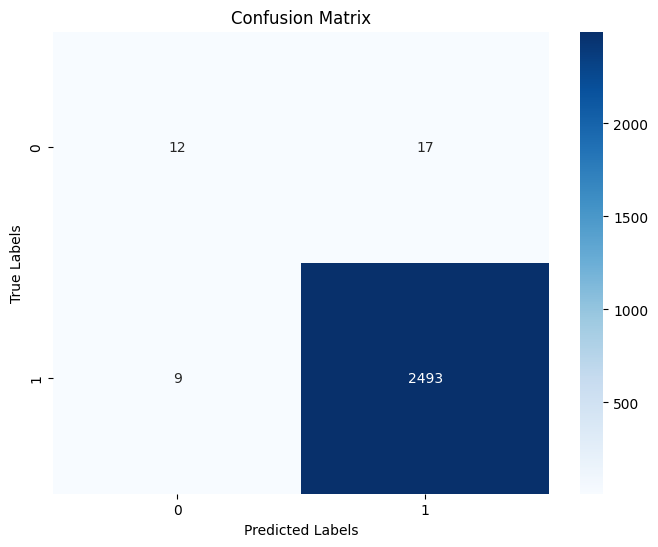

Precision: 0.5714285714285714
Recall: 0.41379310344827586
F1 Score: 0.48000000000000004
Accuracy Score: 0.9897273804820229


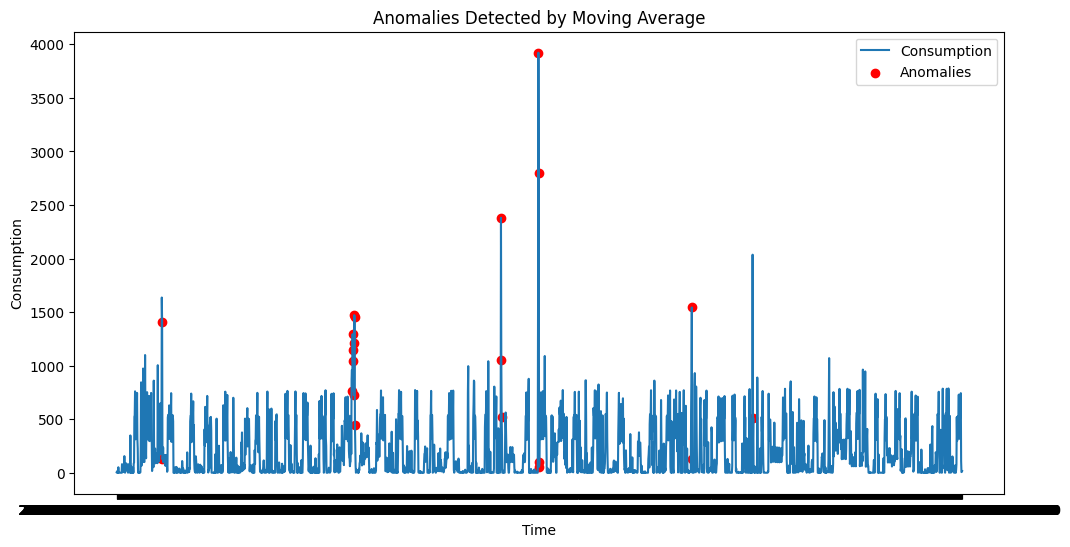

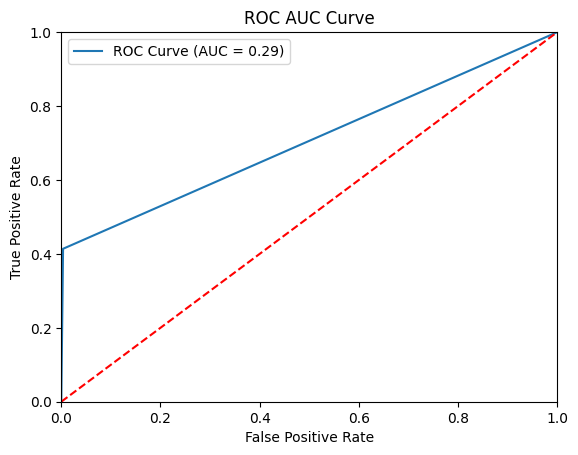

In [ ]:

# Calculate the average and standard deviation of the Consumption column
average = df1['Consumption'].mean()
std_deviation = df1['Consumption'].std()

# Setting the window_size as 3
window_size = 3

# Calculate the moving average of the water readings
ma = df1['Consumption'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df1['Consumption'] - ma

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Update the 'Status' column based on the threshold
df1.loc[ma > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[ma <= threshold, 'Status_pred'] = 'Normal'
df1['Status_pred'].fillna('Normal',inplace=True)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)

# merged_df = df1.merge(df[['created_on', 'Status']], on='created_on', how='outer')
x = pd.concat([df1,df['Status']],axis=1)
from sklearn.metrics import confusion_matrix

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Create the confusion matrix
confusion = confusion_matrix(y_actual, y_pred)
confusion

#Plot the matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_actual, y_pred)
from sklearn.metrics import precision_score, recall_score

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Calculate precision
precision = precision_score(y_actual, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_actual, y_pred, pos_label='Anomaly')
# Calculate F1 score
f1 = f1_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by Moving Average')
plt.legend()
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the moving average
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


## WINDOW SIZE = 4

<ipython-input-18-a4251128249c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Status_pred'].fillna('Normal',inplace=True)


Normal     1675
Anomaly      19
Name: Status_pred, dtype: int64


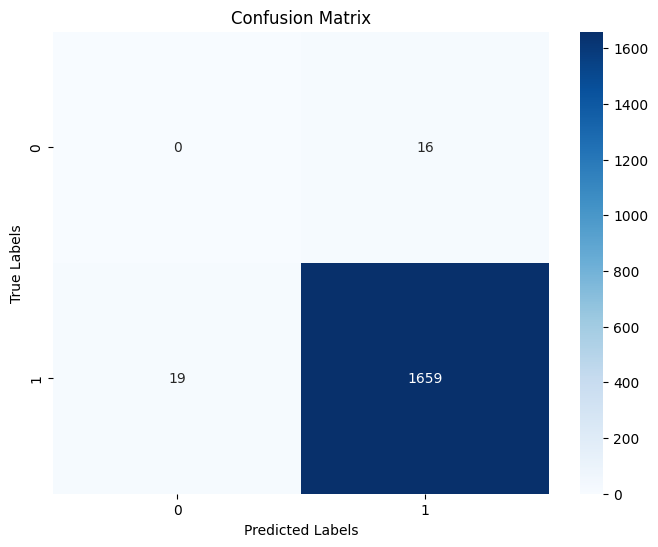

Accuracy Score: 0.9793388429752066
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy Score: 0.9793388429752066


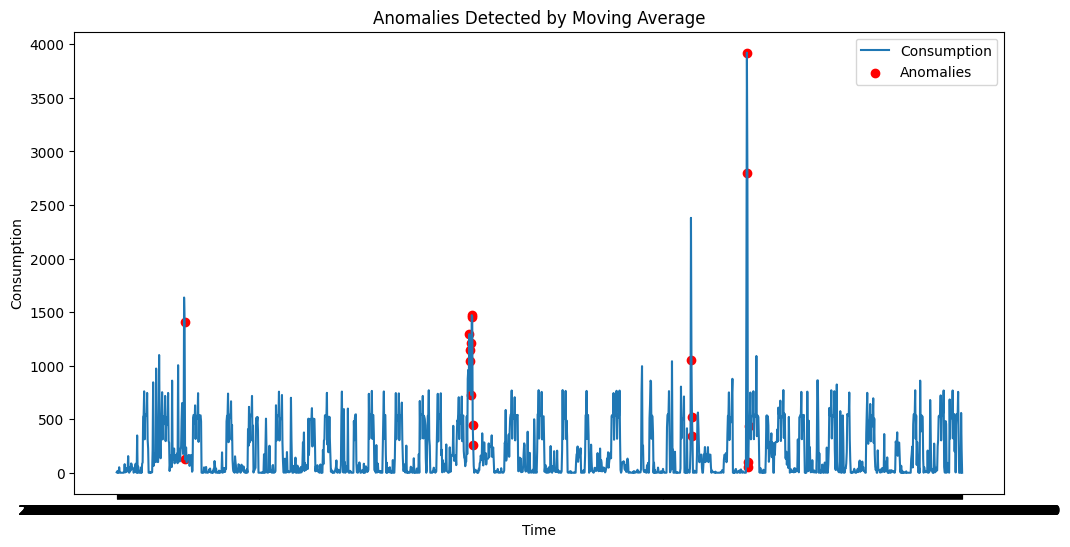

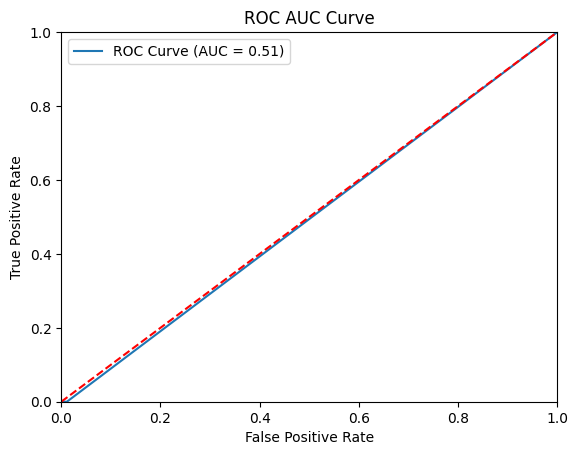

In [ ]:

# Calculate the average and standard deviation of the Consumption column
average = df1['Consumption'].mean()
std_deviation = df1['Consumption'].std()

# Setting the window_size as 4
window_size = 4

# Calculate the moving average of the water readings
ma = df1['Consumption'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df1['Consumption'] - ma

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Update the 'Status' column based on the threshold
df1.loc[ma > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[ma <= threshold, 'Status_pred'] = 'Normal'
df1['Status_pred'].fillna('Normal',inplace=True)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)

# merged_df = df1.merge(df[['created_on', 'Status']], on='created_on', how='outer')
x = pd.concat([df1,df['Status']],axis=1)
from sklearn.metrics import confusion_matrix

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Create the confusion matrix
confusion = confusion_matrix(y_actual, y_pred)
confusion

#Plot the matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_actual, y_pred)
print("Accuracy Score:", accuracy)
from sklearn.metrics import precision_score, recall_score

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Calculate precision
precision = precision_score(y_actual, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_actual, y_pred, pos_label='Anomaly')
# Calculate F1 score
f1 = f1_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by Moving Average')
plt.legend()
plt.show()

# Calculate the predicted probabilities for the moving average
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


# WINDOW SIZE = **5**

Normal     2514
Anomaly      17
Name: Status_pred, dtype: int64


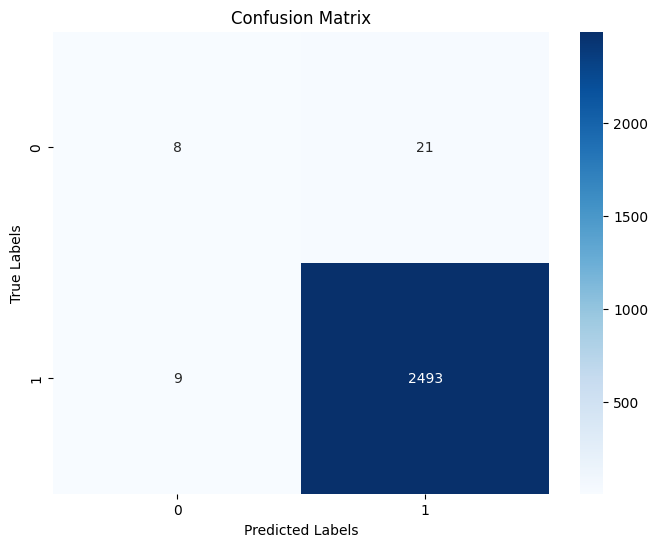

Precision: 0.47058823529411764
Recall: 0.27586206896551724
F1 Score: 0.34782608695652173
Accuracy Score: 0.9881469774792572


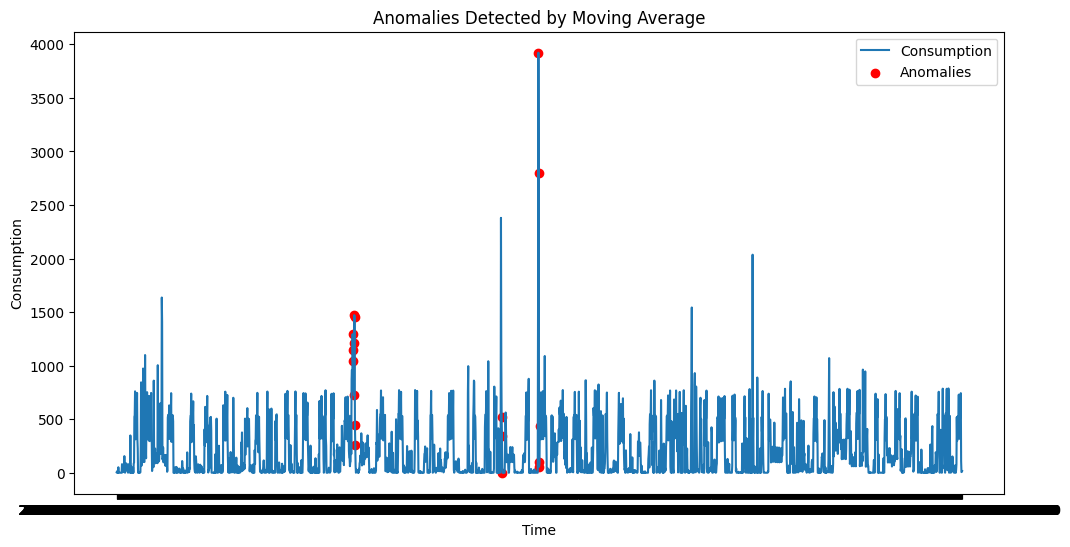

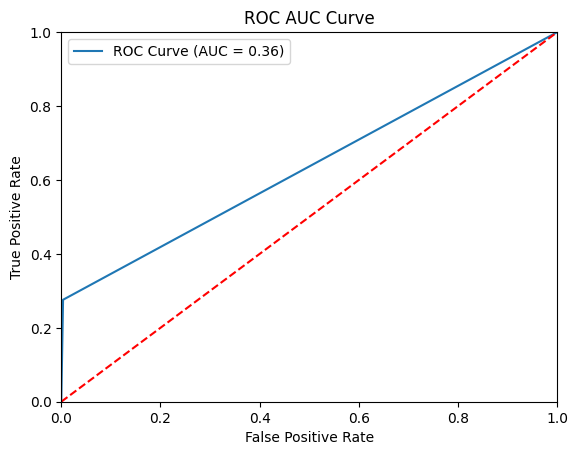

In [ ]:
# Calculate the average and standard deviation of the Consumption column
average = df1['Consumption'].mean()
std_deviation = df1['Consumption'].std()

# Setting the window_size as 5
window_size = 5

# Calculate the moving average of the water readings
ma = df1['Consumption'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = df1['Consumption'] - ma

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Update the 'Status' column based on the threshold
df1.loc[ma > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[ma <= threshold, 'Status_pred'] = 'Normal'
df1['Status_pred'].fillna('Normal',inplace=True)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)

# merged_df = df1.merge(df[['created_on', 'Status']], on='created_on', how='outer')
x = pd.concat([df1,df['Status']],axis=1)
from sklearn.metrics import confusion_matrix

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Create the confusion matrix
confusion = confusion_matrix(y_actual, y_pred)
confusion

#Plot the matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_actual, y_pred)
from sklearn.metrics import precision_score, recall_score

# Get the predicted and actual status values
y_pred = df1['Status_pred']
y_actual = df['Status']

# Calculate precision
precision = precision_score(y_actual, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_actual, y_pred, pos_label='Anomaly')
# Calculate F1 score
f1 = f1_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by Moving Average')
plt.legend()
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for the moving average
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


# EXPONENTIAL WEIGHTED MOVING AVERAGE

# WINDOW SIZE = **2**

EWMA Performance (df1):
Precision: 0.47058823529411764
Recall: 0.27586206896551724
Accuracy: 0.9881469774792572
F1 Score: 0.34782608695652173
Confusion Matrix:
[[   8   21]
 [   9 2493]]

Count of Anomaly and Normal in df1:
Normal     2514
Anomaly      17
Name: Status_pred, dtype: int64


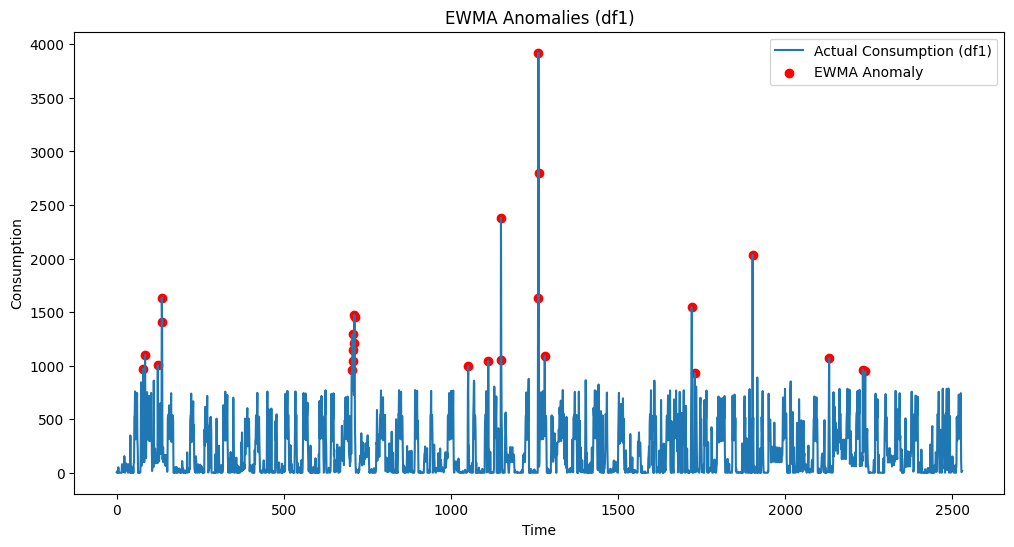

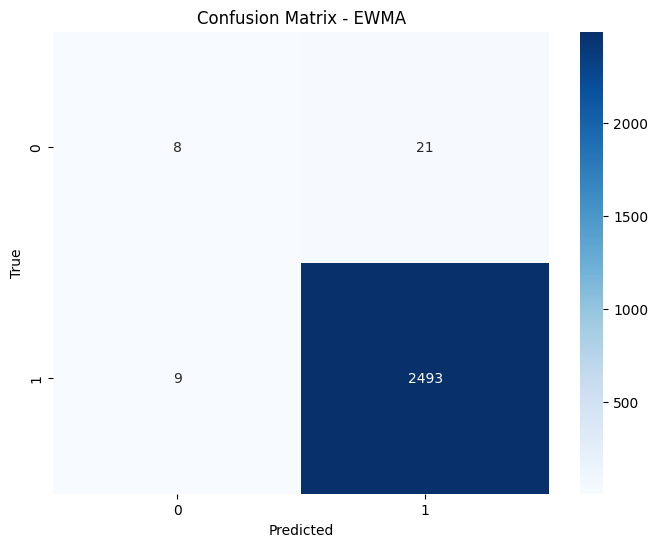

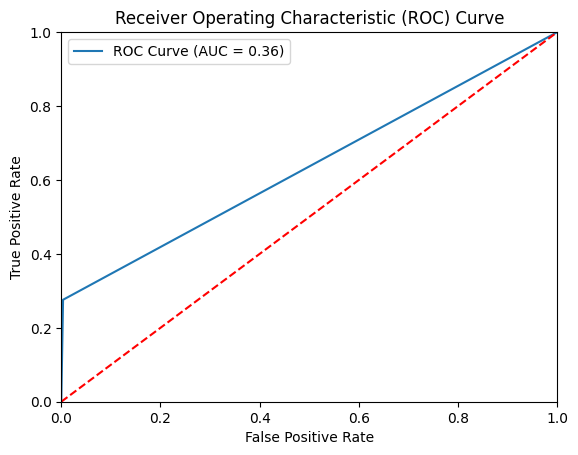

In [ ]:
# Set the window size for EWMA,WINDOW SIZE =6
window_size = 2

# Calculate the Exponential Weighted Moving Average (EWMA) using df1
ewma_df1 = df1['Consumption'].ewm(span=window_size).mean()

# Define the anomaly threshold
threshold = 900

# Create a column for the EWMA anomaly detection using df1
df1['EWMA_Anomaly'] = np.where(df1['Consumption'] > threshold, 'Anomaly', 'Normal')

# Calculate the performance metrics for EWMA using df and df1
ewma_precision = precision_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
ewma_recall = recall_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
ewma_accuracy = accuracy_score(df['Status'], df1['Status_pred'])
ewma_f1 = f1_score(df['Status'], df1['Status_pred'], pos_label='Anomaly')
ewma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Print the performance metrics for EWMA using df and df1
print("EWMA Performance (df1):")
print("Precision:", ewma_precision)
print("Recall:", ewma_recall)
print("Accuracy:", ewma_accuracy)
print("F1 Score:", ewma_f1)
print("Confusion Matrix:")
print(ewma_confusion_matrix)
print()
# Count the occurrences of each status in df1
status_counts_df1 = df1['Status_pred'].value_counts()
print("Count of Anomaly and Normal in df1:")
print(status_counts_df1)

# Plot the actual consumption and identified anomalies using EWMA (df1)
plt.figure(figsize=(12, 6))
plt.plot(df1['Consumption'], label='Actual Consumption (df1)')
plt.scatter(df1[df1['EWMA_Anomaly'] == 'Anomaly'].index, df1[df1['EWMA_Anomaly'] == 'Anomaly']['Consumption'],
            color='red', label='EWMA Anomaly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('EWMA Anomalies (df1)')
plt.legend()
plt.show()

# Plot the confusion matrix for EWMA using df and df1
plt.figure(figsize=(8, 6))
sns.heatmap(ewma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - EWMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate the predicted probabilities for WMA
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# **WEIGHTED MOVING AVERAGE**

# WINDOW SIZE =**6**

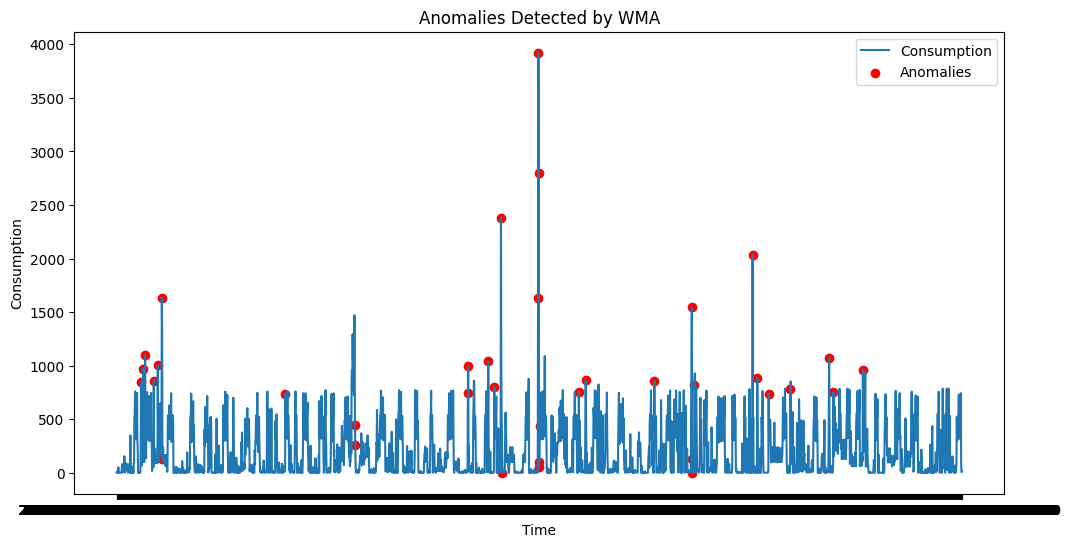

Precision: 0.3888888888888889
Recall: 0.4827586206896552
F1 Score: 0.43076923076923074
Accuracy: 0.9853812722244172
Normal     2495
Anomaly      36
Name: Status_pred, dtype: int64


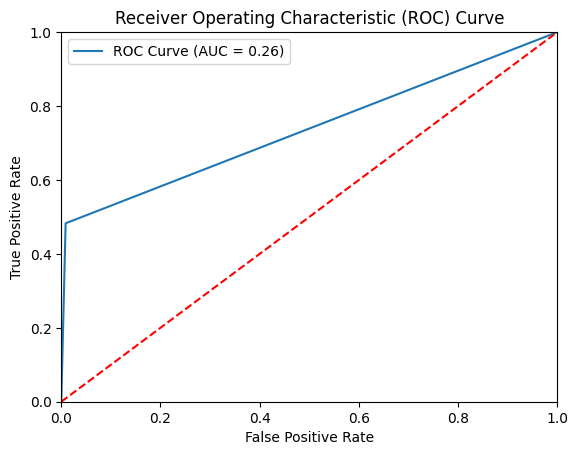

In [ ]:

# Set the window size for WMA= 6
window_size = 6

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df1['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df1['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df1.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()

#Performance
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create the target labels and predicted labels arrays
y_true = df['Status']
y_pred = df1['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)
# Calculate the predicted probabilities for WMA
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# WINDOW SIZE = **18**

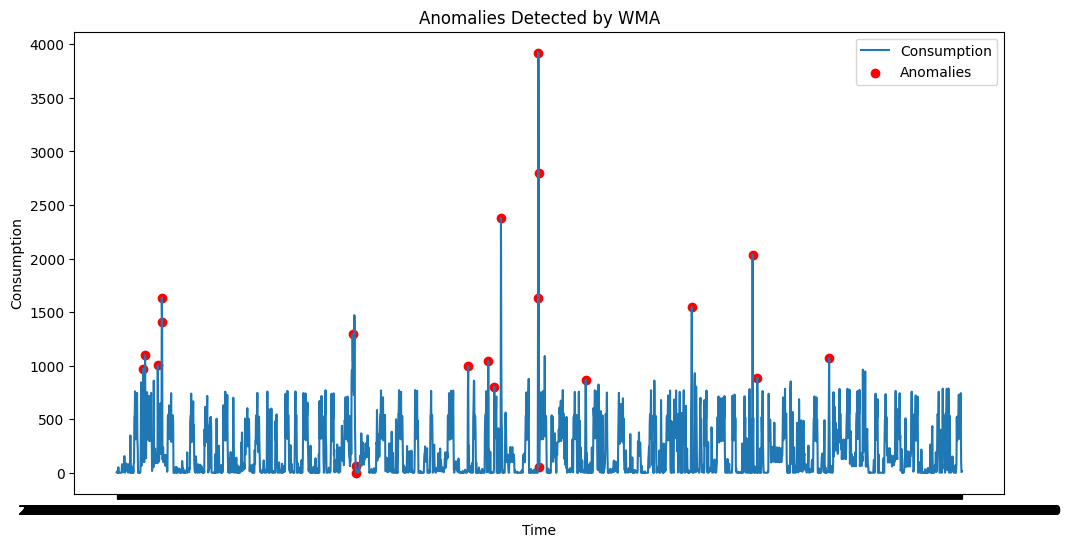

Precision: 0.7142857142857143
Recall: 0.5172413793103449
F1 Score: 0.6000000000000001
Accuracy: 0.9920979849861715
Normal     2510
Anomaly      21
Name: Status_pred, dtype: int64


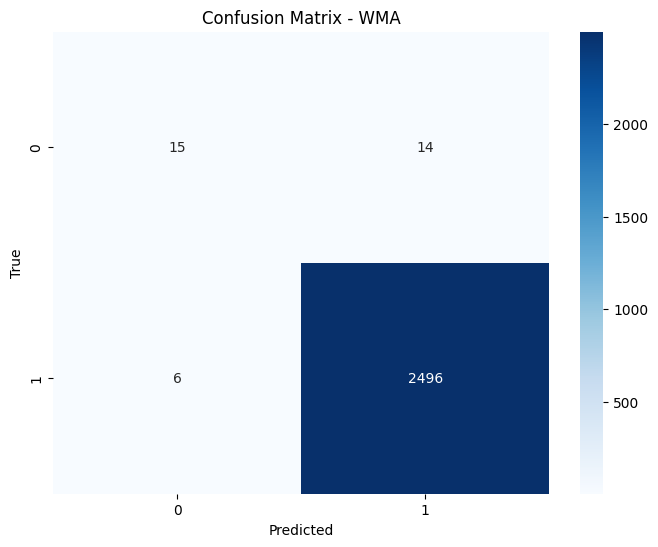

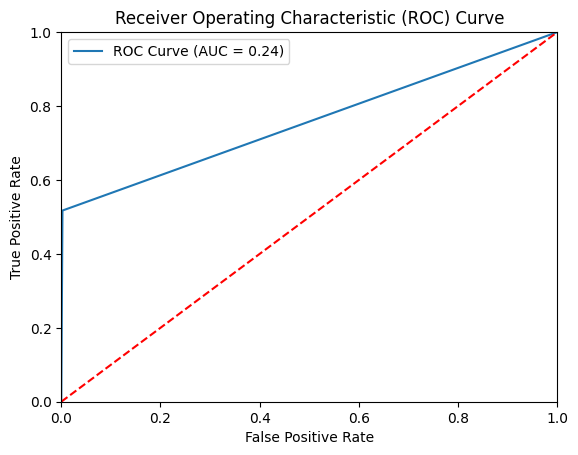

Confusion Matrix:
[[  15   14]
 [   6 2496]]


In [ ]:
# Set the window size for WMA = 18
window_size = 18

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df1['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df1['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df1.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create the target labels and predicted labels arrays
y_true = df['Status']
y_pred = df1['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)
# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - WMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Calculate the predicted probabilities for WMA
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Print the confusion matrix
print("Confusion Matrix:")
print(wma_confusion_matrix)


# **WINDOW SIZE AS 20**
 WEIGHTED MOVING AVERAGE


Precision: 0.8823529411764706
Recall: 0.5172413793103449
F1 Score: 0.6521739130434783
Accuracy: 0.9936783879889372


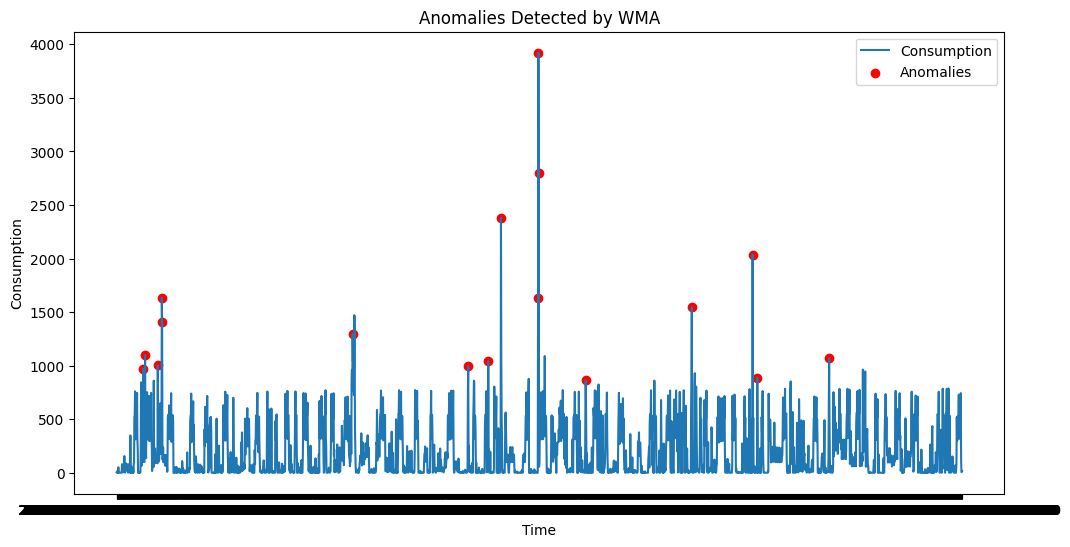

Normal     2514
Anomaly      17
Name: Status_pred, dtype: int64


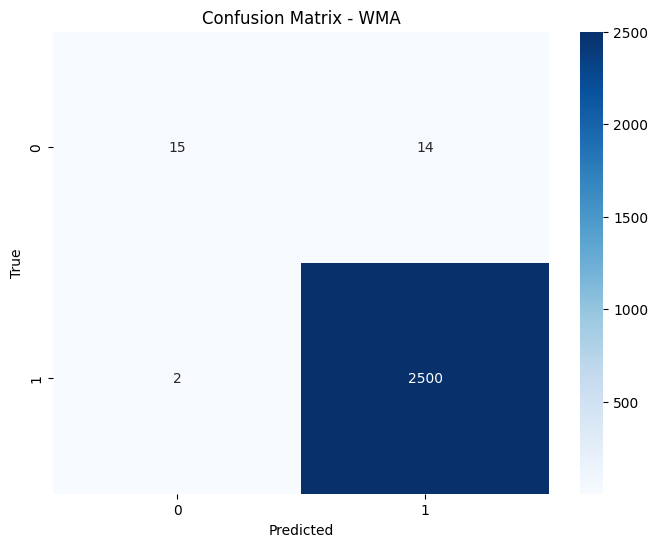

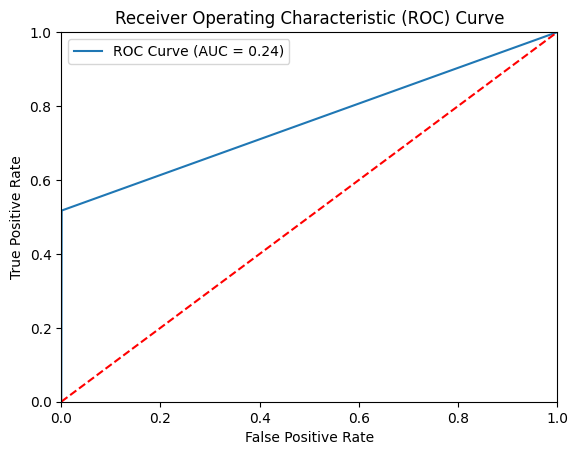

Confusion Matrix:
[[  15   14]
 [   2 2500]]


In [ ]:
# Set the window size for WMA =20
window_size = 20

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df1['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df1['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df1.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'
# Create the target labels and predicted labels arrays
y_true = df['Status']
y_pred = df1['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()


# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)
# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - WMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for WMA
y_pred_proba = np.where(df1['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Print the confusion matrix
print("Confusion Matrix:")
print(wma_confusion_matrix)


## BEST OF ALL WITH WINDOW SIZE AS **23**


# **WINDOW SIZE = 23**

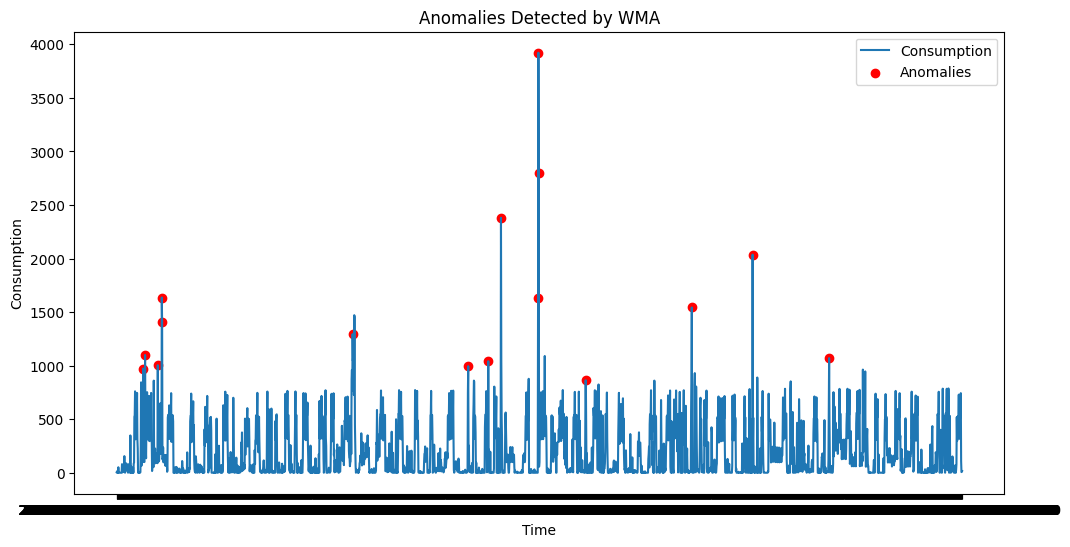

Precision: 0.9375
Recall: 0.5172413793103449
F1 Score: 0.6666666666666667
Accuracy: 0.9940734887396286
Normal     2515
Anomaly      16
Name: Status_pred, dtype: int64


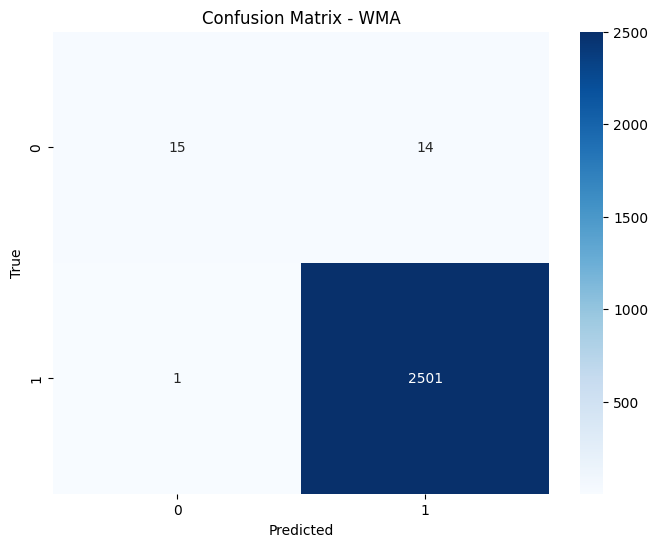

Confusion Matrix:
[[  15   14]
 [   1 2501]]


In [ ]:
# Set the window size for WMA = 23
window_size = 23

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df1['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df1['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df1.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create the target labels and predicted labels arrays
y_true = df['Status']
y_pred = df1['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)
# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - WMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Print the confusion matrix
print("Confusion Matrix:")
print(wma_confusion_matrix)



#  WINDOW SIZE 25


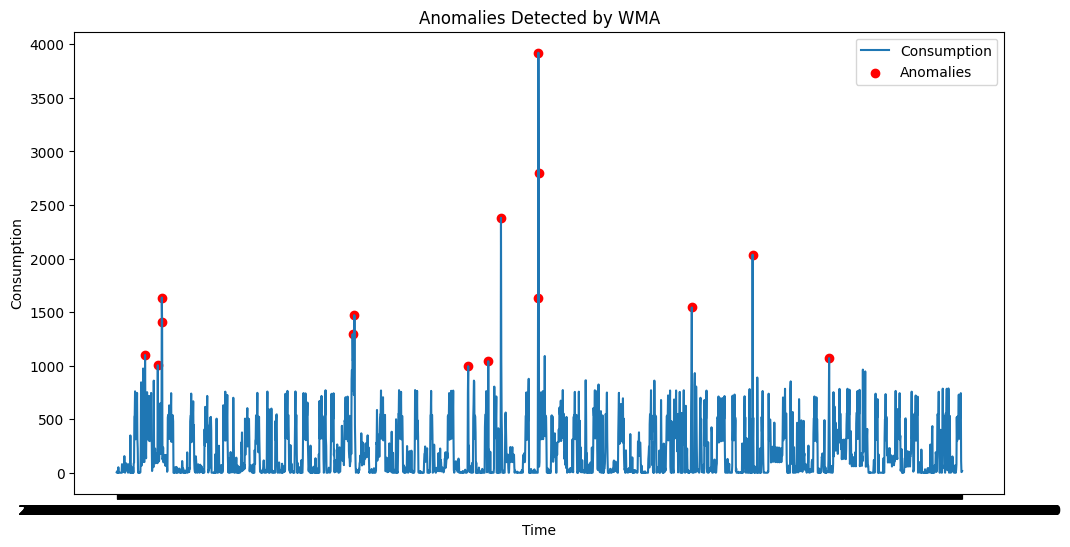

Precision: 1.0
Recall: 0.5172413793103449
F1 Score: 0.6818181818181819
Accuracy: 0.99446858949032
Normal     2516
Anomaly      15
Name: Status_pred, dtype: int64


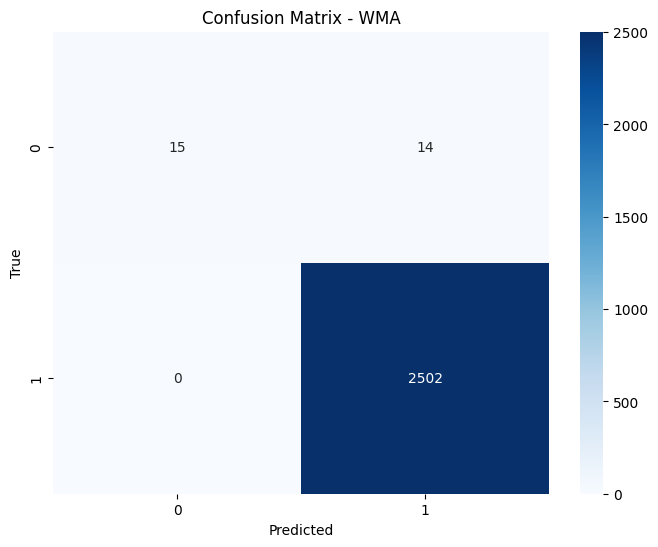

Confusion Matrix:
[[  15   14]
 [   0 2502]]


In [ ]:
# Set the window size for WMA = 25
window_size = 25

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df1['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df1['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df1.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df1.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df1['created_on'], df1['Consumption'], label='Consumption')
plt.scatter(df1[df1['Status_pred'] == 'Anomaly']['created_on'], df1[df1['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create the target labels and predicted labels arrays
y_true = df['Status']
y_pred = df1['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Count the occurrences of each status
status_counts = df1['Status_pred'].value_counts()

# Print the count of Anomaly and Normal
print(status_counts)
# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - WMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate the confusion matrix for WMA using df and df1
wma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Print the confusion matrix
print("Confusion Matrix:")
print(wma_confusion_matrix)



# **TRIANGULAR MOVING AVERAGE**

TMA Performance (df1):
Precision: 0.47368421052631576
Recall: 0.5294117647058824
Accuracy: 0.9928881864875543
F1 Score: 0.5
Confusion Matrix:
[[   9    8]
 [  10 2504]]



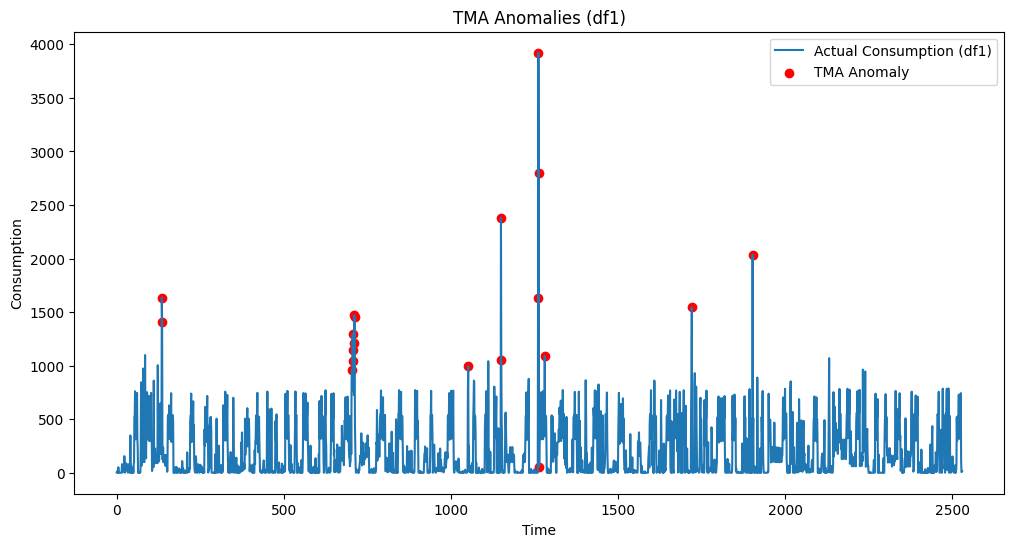

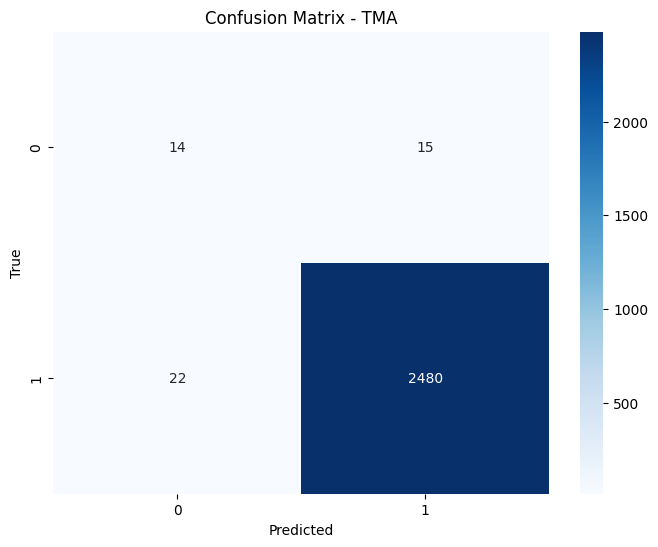

TMA Anomaly Count: 19
TMA Normal Count: 2512


In [ ]:
# Set the window size for TMA
window_size_tma = 2

# Calculate the Triangular Moving Average (TMA) using df1
weights = np.arange(1, window_size_tma + 1)
tma_df1 = df1['Consumption'].rolling(window=window_size_tma, center=True).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Define the anomaly threshold
threshold = 900

# Create a column for the TMA anomaly detection using df1
df1['TMA_Anomaly'] = np.where(tma_df1 > threshold, 'Anomaly', 'Normal')

# Calculate the performance metrics for TMA using df1
tma_precision = precision_score(df1['Status_pred'], df1['TMA_Anomaly'], pos_label='Anomaly')
tma_recall = recall_score(df1['Status_pred'], df1['TMA_Anomaly'], pos_label='Anomaly')
tma_accuracy = accuracy_score(df1['Status_pred'], df1['TMA_Anomaly'])
tma_f1 = f1_score(df1['Status_pred'], df1['TMA_Anomaly'], pos_label='Anomaly')
tma_confusion_matrix = confusion_matrix(df1['Status_pred'], df1['TMA_Anomaly'])

# Print the performance metrics for TMA using df1
print("TMA Performance (df1):")
print("Precision:", tma_precision)
print("Recall:", tma_recall)
print("Accuracy:", tma_accuracy)
print("F1 Score:", tma_f1)
print("Confusion Matrix:")
print(tma_confusion_matrix)
print()

# Plot the actual consumption and identified anomalies using TMA (df1)
plt.figure(figsize=(12, 6))
plt.plot(df1['Consumption'], label='Actual Consumption (df1)')
plt.scatter(df1[df1['TMA_Anomaly'] == 'Anomaly'].index, df1[df1['TMA_Anomaly'] == 'Anomaly']['Consumption'],
            color='red', label='TMA Anomaly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('TMA Anomalies (df1)')
plt.legend()
plt.show()
# Calculate the confusion matrix for WMA using df and df1
tma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Count the occurrences of anomalies and normal readings after TMA
tma_anomaly_count = df1[df1['TMA_Anomaly'] == 'Anomaly'].shape[0]
tma_normal_count = df1[df1['TMA_Anomaly'] == 'Normal'].shape[0]
# Print the counts after TMA
print("TMA Anomaly Count:", tma_anomaly_count)
print("TMA Normal Count:", tma_normal_count)

# **VARIABLE MOVING AVERAGE**

VMA Performance (df1):
Precision: 0.42105263157894735
Recall: 0.2222222222222222
Accuracy: 0.9845910707230344
F1 Score: 0.2909090909090909
Confusion Matrix:
[[   8   28]
 [  11 2484]]

VMA Anomaly Count: 19
VMA Normal Count: 2512


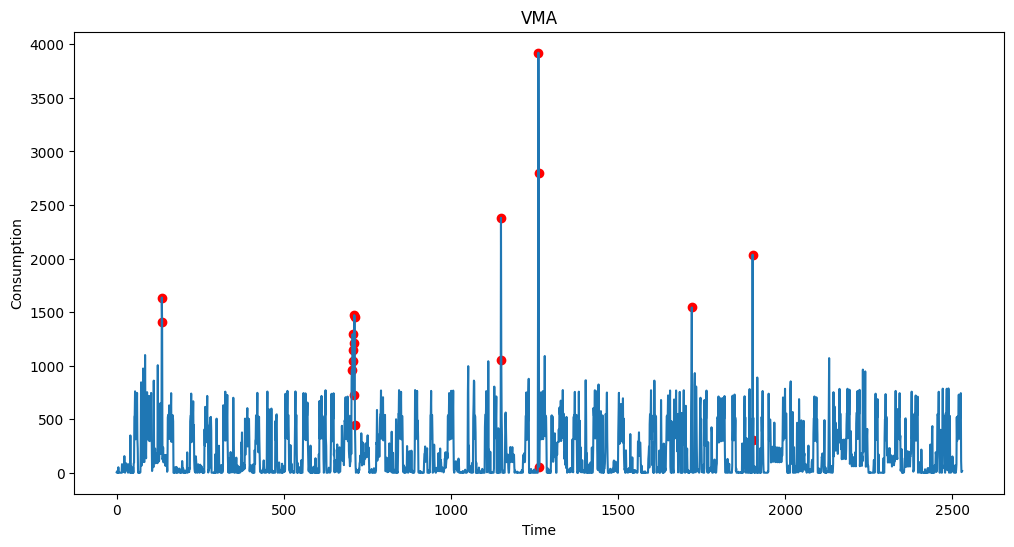

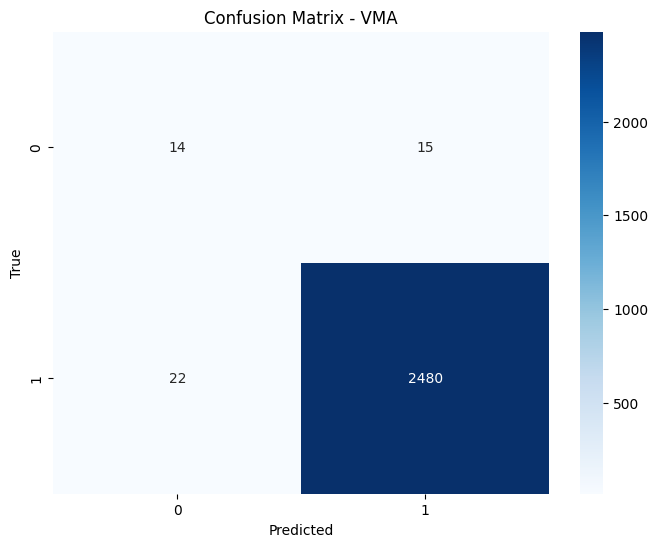

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Set the window size for VMA
window_size_vma = 2

# Calculate the Variable Moving Average (VMA) using df1
vma_df1 = df1['Consumption'].rolling(window=window_size_vma).mean()

# Define the anomaly threshold
threshold = 900

# Create a column for the VMA anomaly detection using df1
df1['VMA_Anomaly'] = np.where(vma_df1 > threshold, 'Anomaly', 'Normal')

# Calculate the performance metrics for VMA using df1
vma_precision = precision_score(df1['Status_pred'], df1['VMA_Anomaly'], pos_label='Anomaly')
vma_recall = recall_score(df1['Status_pred'], df1['VMA_Anomaly'], pos_label='Anomaly')
vma_accuracy = accuracy_score(df1['Status_pred'], df1['VMA_Anomaly'])
vma_f1 = f1_score(df1['Status_pred'], df1['VMA_Anomaly'], pos_label='Anomaly')
vma_confusion_matrix = confusion_matrix(df1['Status_pred'], df1['VMA_Anomaly'])

# Print the performance metrics for VMA using df1
print("VMA Performance (df1):")
print("Precision:", vma_precision)
print("Recall:", vma_recall)
print("Accuracy:", vma_accuracy)
print("F1 Score:", vma_f1)
print("Confusion Matrix:")
print(vma_confusion_matrix)
print()

# Plot the actual consumption and identified anomalies using VMA (df1)
plt.figure(figsize=(12, 6))
plt.plot(df1['Consumption'], label='Actual Consumption (df1)')
plt.scatter(df1[df1['VMA_Anomaly'] == 'Anomaly'].index, df1[df1['VMA_Anomaly'] == 'Anomaly']['Consumption'],
            color='red', label='VMA Anomaly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('VMA')
# Count the occurrences of anomalies and normal readings after VMA
vma_anomaly_count = df1[df1['VMA_Anomaly'] == 'Anomaly'].shape[0]
vma_normal_count = df1[df1['VMA_Anomaly'] == 'Normal'].shape[0]

# Print the counts after VMA
print("VMA Anomaly Count:", vma_anomaly_count)
print("VMA Normal Count:", vma_normal_count)

# Calculate the confusion matrix for VMA using df and df1
vma_confusion_matrix = confusion_matrix(df['Status'], df1['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(vma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - VMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **LEAST SQUARE MOVING AVERAGE**

Performance Metrics:
Precision: 1.0
Recall: 0.19444444444444445
Accuracy: 0.9885420782299487
F1 Score: 0.32558139534883723
Count of Anomaly: 7
Count of Normal: 2524


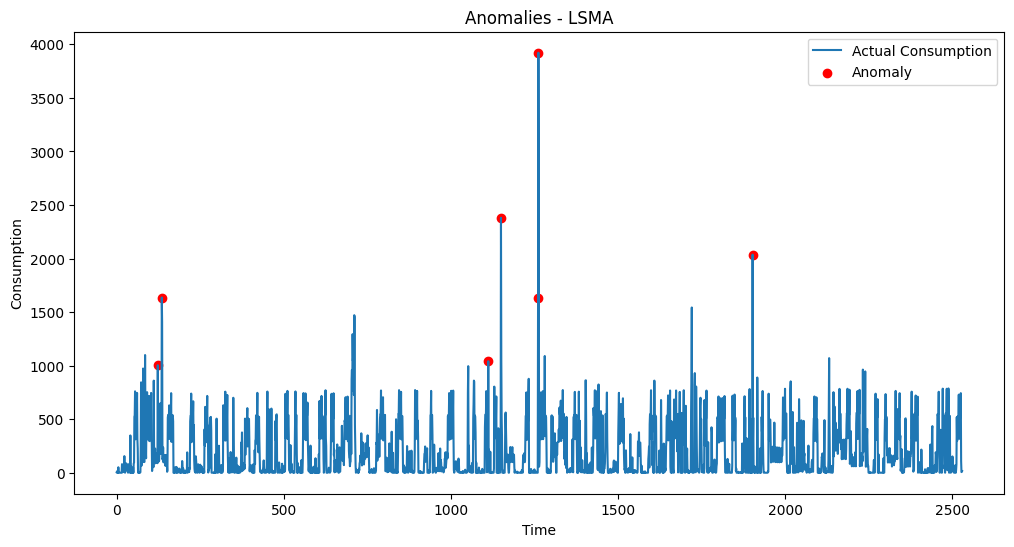

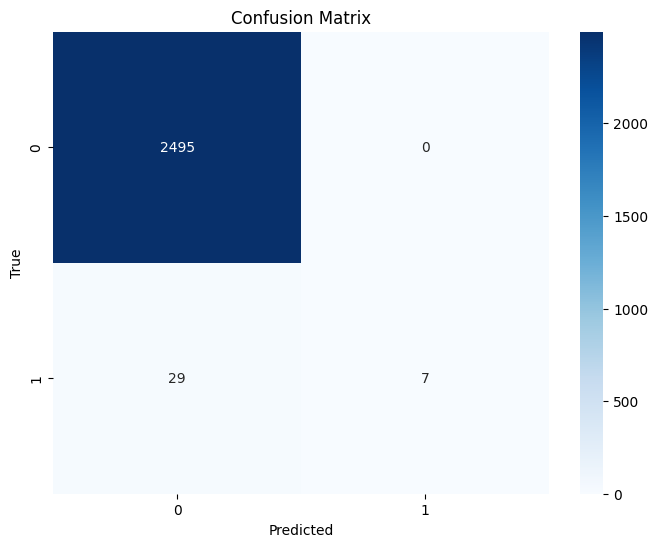

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Set the window size for the LSMA
window_size = 2

# Calculate the LSMA using the least squares method
df1['LSMA'] = df1['Consumption'].rolling(window_size).apply(lambda x: np.linalg.lstsq(np.vstack([np.arange(window_size), np.ones(window_size)]).T, x, rcond=None)[0][0])

# Define the anomaly threshold
threshold = 900

# Create a column for the anomaly detection using the LSMA
df1['Anomaly'] = np.where(df1['LSMA'] > threshold, 'Anomaly', 'Normal')

# Calculate the performance metrics
precision = precision_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly', zero_division=0)
recall = recall_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly', zero_division=0)
accuracy = accuracy_score(df1['Status_pred'], df1['Anomaly'])
f1 = f1_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly')

# Count the occurrences of each status in df1
status_counts_df1 = df1['Anomaly'].value_counts()
count_anomaly = status_counts_df1.get('Anomaly', 0)
count_normal = status_counts_df1.get('Normal', 0)

# Print the performance metrics
print("Performance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Count of Anomaly:", count_anomaly)
print("Count of Normal:", count_normal)

# Plot the anomalies using the LSMA
plt.figure(figsize=(12, 6))
plt.plot(df1['Consumption'], label='Actual Consumption')
plt.scatter(df1[df1['Anomaly'] == 'Anomaly'].index, df1[df1['Anomaly'] == 'Anomaly']['Consumption'],
            color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies - LSMA')
plt.legend()
plt.show()

# Calculate the confusion matrix
confusion_mat = confusion_matrix(df1['Status_pred'], df1['Anomaly'], labels=['Normal', 'Anomaly'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **DOUBLE EXPONENTIAL MOVING AVERAGE**

Performance Metrics:
Precision: 0.34782608695652173
Recall: 0.47058823529411764
Accuracy: 0.9905175819834058
F1 Score: 0.39999999999999997
Count of Anomaly: 23
Count of Normal: 2508


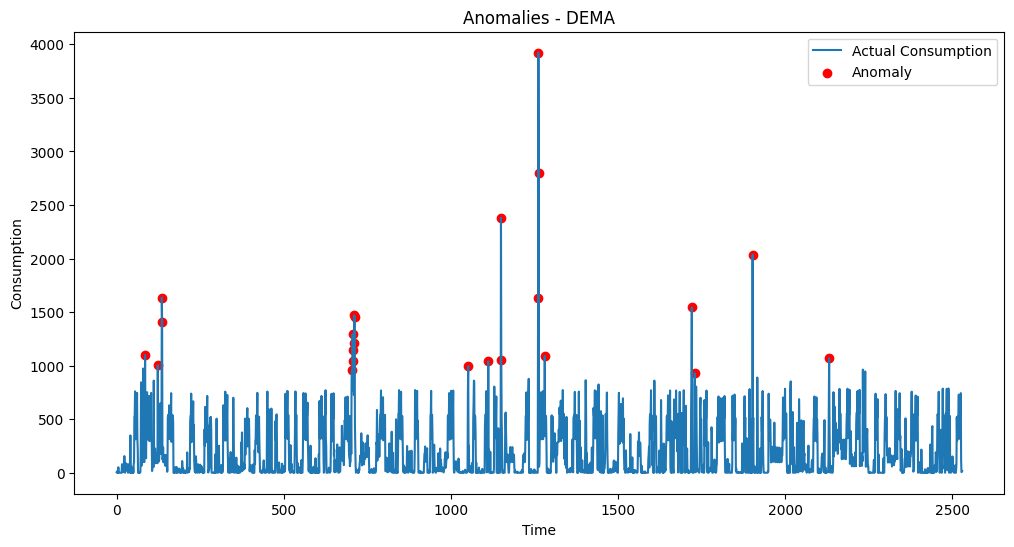

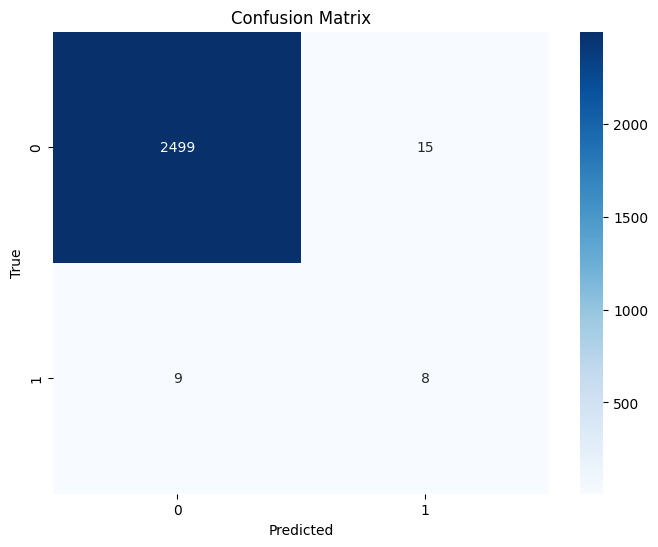

In [ ]:
# Set the window size for the DEMA
window_size = 2

# Calculate the EMA
ema = df1['Consumption'].ewm(span=window_size).mean()

# Calculate the DEMA
dema = 2 * ema - ema.ewm(span=window_size).mean()

# Define the anomaly threshold
threshold = 900

# Create a column for the anomaly detection using the DEMA
df1['Anomaly'] = np.where(dema > threshold, 'Anomaly', 'Normal')

# Calculate the performance metrics
precision = precision_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly', zero_division=0)
recall = recall_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly', zero_division=0)
accuracy = accuracy_score(df1['Status_pred'], df1['Anomaly'])
f1 = f1_score(df1['Status_pred'], df1['Anomaly'], pos_label='Anomaly')

# Count the occurrences of each status in df1
status_counts_df1 = df1['Anomaly'].value_counts()
count_anomaly = status_counts_df1.get('Anomaly', 0)
count_normal = status_counts_df1.get('Normal', 0)

# Print the performance metrics
print("Performance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Count of Anomaly:", count_anomaly)
print("Count of Normal:", count_normal)

# Plot the anomalies using the DEMA
plt.figure(figsize=(12, 6))
plt.plot(df1['Consumption'], label='Actual Consumption')
plt.scatter(df1[df1['Anomaly'] == 'Anomaly'].index, df1[df1['Anomaly'] == 'Anomaly']['Consumption'],
            color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies - DEMA')
plt.legend()
plt.show()

# Calculate the confusion matrix
confusion_mat = confusion_matrix(df1['Status_pred'], df1['Anomaly'], labels=['Normal', 'Anomaly'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **PROVIDING NEW DATA**

In [ ]:
# Load the dataset
df2 = pd.read_excel('/content/TIRUMALA_GRANULAR_DATA+_APRIL25_APRIL30.xlsx')
df2

,created_on,Consumption
0,"Mon, 25 Apr 2022 00:03:45 GMT",2
1,"Mon, 25 Apr 2022 00:10:47 GMT",21
2,"Mon, 25 Apr 2022 00:13:46 GMT",1
3,"Mon, 25 Apr 2022 00:18:46 GMT",2
4,"Mon, 25 Apr 2022 00:23:45 GMT",0
...,...,...
1689,"Sat, 30 Apr 2022 23:40:52 GMT",0
1690,"Sat, 30 Apr 2022 23:43:47 GMT",0
1691,"Sat, 30 Apr 2022 23:48:46 GMT",208
1692,"Sat, 30 Apr 2022 23:53:46 GMT",238


In [ ]:
df2.shape

(1694, 2)

In [ ]:
# Load the dataset
df3 = pd.read_excel('/content/Manually-labelled_APRIL25_APRIL30.xlsx')
df3

,created_on,Consumption,Status
0,"Mon, 25 Apr 2022 00:03:45 GMT",2,Normal
1,"Mon, 25 Apr 2022 00:10:47 GMT",21,Normal
2,"Mon, 25 Apr 2022 00:13:46 GMT",1,Normal
3,"Mon, 25 Apr 2022 00:18:46 GMT",2,Normal
4,"Mon, 25 Apr 2022 00:23:45 GMT",0,Normal
...,...,...,...
1689,"Sat, 30 Apr 2022 23:40:52 GMT",0,Normal
1690,"Sat, 30 Apr 2022 23:43:47 GMT",0,Normal
1691,"Sat, 30 Apr 2022 23:48:46 GMT",208,Normal
1692,"Sat, 30 Apr 2022 23:53:46 GMT",238,Normal


In [ ]:
df3.shape

(1694, 3)

Summary Statistics:
       Consumption
count  1694.000000
mean    217.219599
std     249.218341
min       0.000000
25%       7.000000
50%      98.500000
75%     459.000000
max    1725.000000


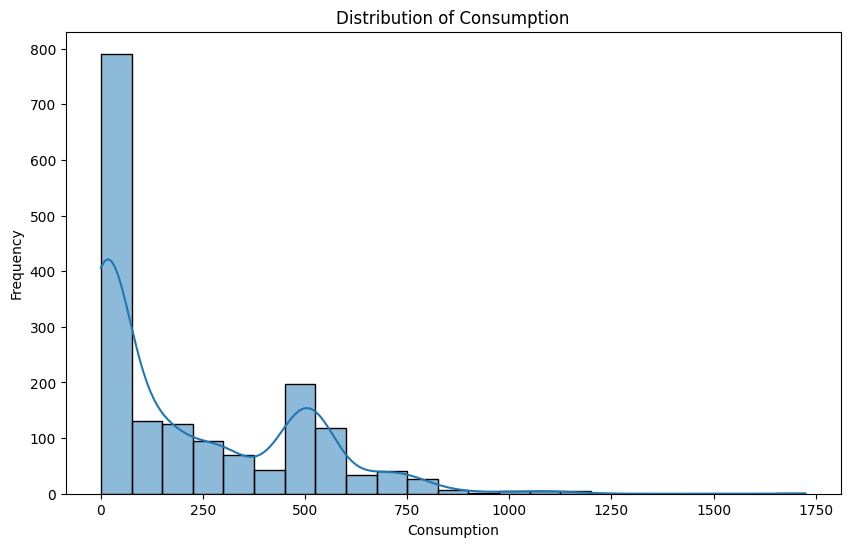

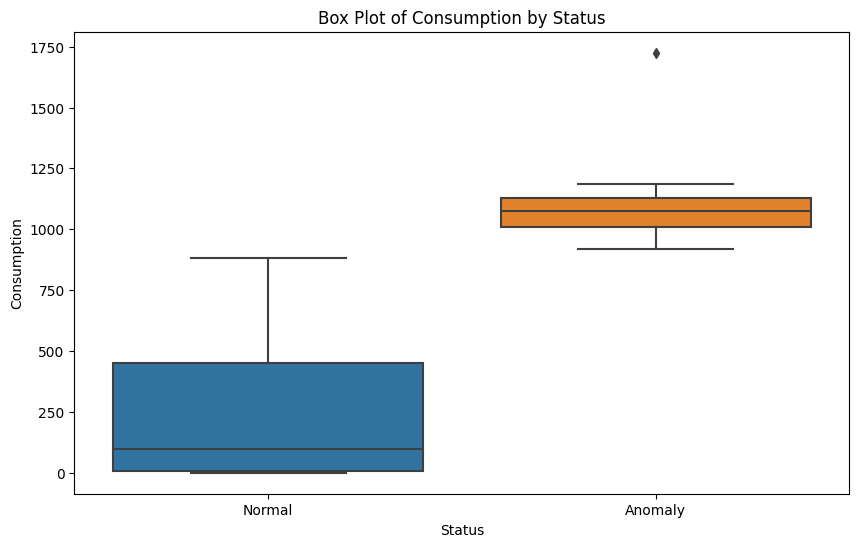

<ipython-input-63-f22e32b2e751>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')


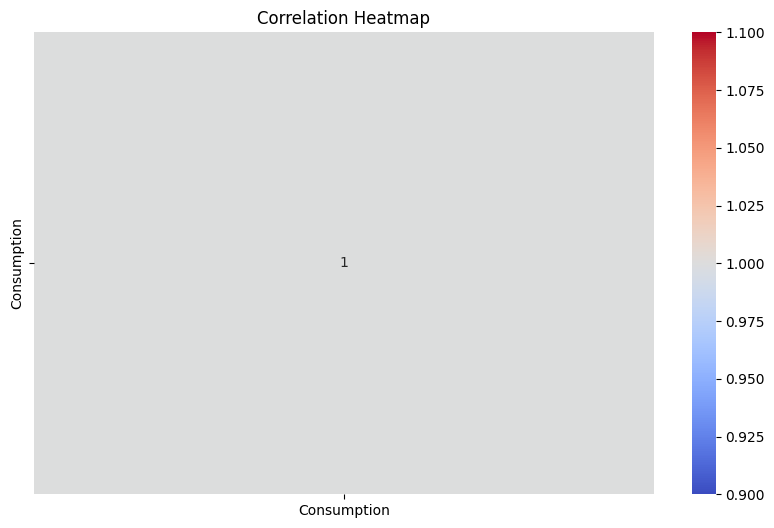

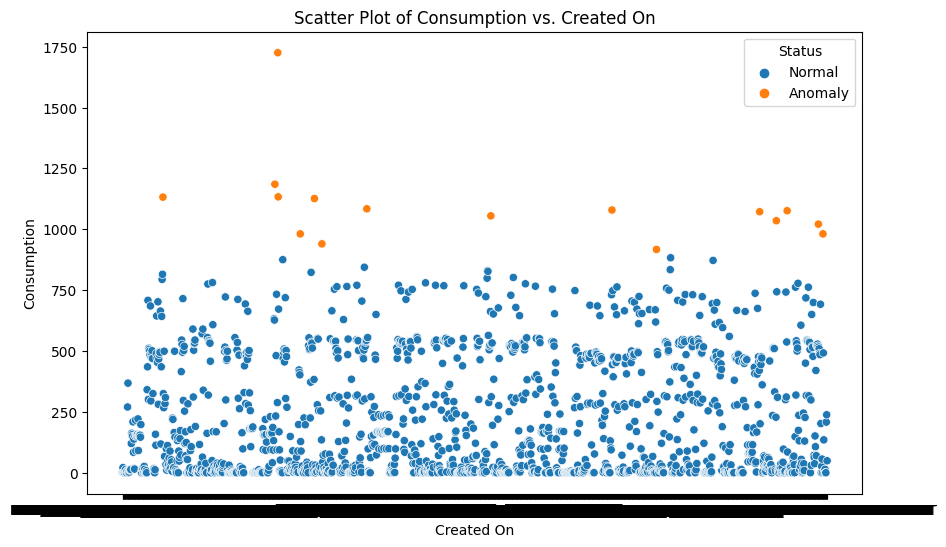

In [ ]:
# Summary statistics
print('Summary Statistics:')
print(df3.describe())

# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df3['Consumption'], kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

# Box plot of Consumption by Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Consumption', data=df3)
plt.title('Box Plot of Consumption by Status')
plt.xlabel('Status')
plt.ylabel('Consumption')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of Consumption vs. Created On
plt.figure(figsize=(10, 6))
sns.scatterplot(x='created_on', y='Consumption', hue='Status', data=df3)
plt.title('Scatter Plot of Consumption vs. Created On')
plt.xlabel('Created On')
plt.ylabel('Consumption')
plt.show()

In [ ]:
# Count the number of Normal and Anomaly values in the Status column
status_counts = df3['Status'].value_counts()
normal_count = status_counts['Normal']
anomaly_count = status_counts['Anomaly']
print('Number of Normal records:', normal_count)
print('Number of Anomaly records:', anomaly_count)

Number of Normal records: 1678
Number of Anomaly records: 16


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

class WMAAnomalyDetector:
    def __init__(self, window_size=3, threshold=900):
        self.window_size = window_size
        self.threshold = threshold
        self.weights = np.arange(1, window_size + 1)
        self.wma = None
        self.deviation = None

    def fit(self, data):
        self.wma = data.rolling(self.window_size).apply(lambda x: np.dot(x, self.weights) / self.weights.sum(), raw=True)
        self.deviation = data - self.wma

    def predict(self, data):
        deviation_new = data - self.wma
        status_pred = np.where(deviation_new > self.threshold, 'Anomaly', 'Normal')
        return status_pred

    def evaluate_performance(self, true_labels, predicted_labels):
        true_labels = np.array(true_labels)
        predicted_labels = np.array(predicted_labels)

        # Calculate True Positives, False Positives, False Negatives
        TP = np.sum((true_labels == 'Anomaly') & (predicted_labels == 'Anomaly'))
        FP = np.sum((true_labels == 'Normal') & (predicted_labels == 'Anomaly'))
        FN = np.sum((true_labels == 'Anomaly') & (predicted_labels == 'Normal'))

        # Calculate Precision and Recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        return precision, recall




# Plot the anomalies (optional)
plt.figure(figsize=(12, 6))
plt.plot(df2['created_on'], df2['Consumption'], label='Consumption')
plt.scatter(df2[df2['Status_pred'] == 'Anomaly']['created_on'], df2[df2['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()

# Save df2 with the 'Status_pred' column to a CSV file
df2.to_csv('df2_with_status_pred.csv', index=False)



ValueError: ignored

Missing timestamps in df2: Series([], Name: created_on, dtype: object)
Shape of true_labels: (1694,)
Shape of predicted_labels: (1694,)
Number of common timestamps: 1694
Precision (Anomaly): 0.0
Recall (Anomaly): 0.0


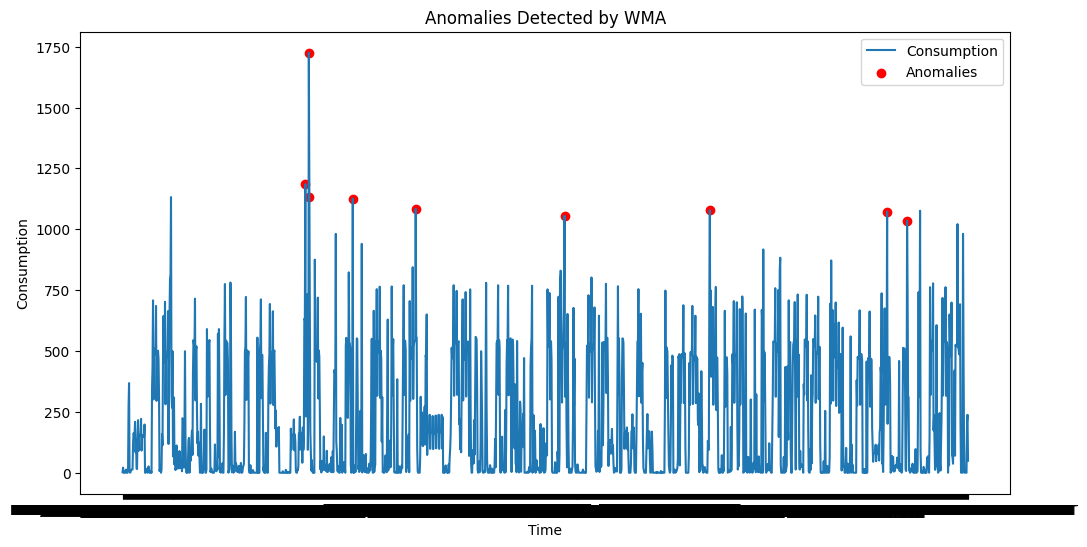

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

class WMAAnomalyDetector:
    def __init__(self, window_size=3, threshold=900):
        self.window_size = window_size
        self.threshold = threshold
        self.weights = np.arange(1, window_size + 1)
        self.wma = None
        self.deviation = None

    def fit(self, data):
        self.wma = data.rolling(self.window_size).apply(lambda x: np.dot(x, self.weights) / self.weights.sum(), raw=True)
        self.deviation = data - self.wma

    def predict(self, data):
        deviation_new = data - self.wma
        status_pred = np.where(deviation_new > self.threshold, 'Anomaly', 'Normal')
        return status_pred

    def evaluate_performance(self, true_labels, predicted_labels):
        true_labels = np.array(true_labels)
        predicted_labels = np.array(predicted_labels)

        # Calculate True Positives, False Positives, False Negatives
        TP = np.sum((true_labels == 'Anomaly') & (predicted_labels == 'Anomaly'))
        FP = np.sum((true_labels == 'Normal') & (predicted_labels == 'Anomaly'))
        FN = np.sum((true_labels == 'Anomaly') & (predicted_labels == 'Normal'))

        # Calculate Precision and Recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        return precision, recall

# Assuming df contains manual labeled data and df2 is a different data without labels
# df should have 'created_on' and 'Status' columns, and df2 should have 'created_on' and 'Consumption' columns.

# Create an instance of the WMAAnomalyDetector and fit the model on the manual labeled data (df)
wma_detector = WMAAnomalyDetector(window_size=6, threshold=900)
wma_detector.fit(df['Consumption'])

# Apply the trained model to predict anomalies on the new dataset (df2)
df2['Status_pred'] = wma_detector.predict(df2['Consumption'])

# Merge df and df2 based on the 'created_on' column
merged_df = pd.merge(df2, df[['created_on', 'Status']], on='created_on', how='left')

# Check for missing timestamps in df2
missing_timestamps = df2[~df2['created_on'].isin(merged_df['created_on'])]['created_on']
print("Missing timestamps in df2:", missing_timestamps)

# Extract the true 'Status' labels from the merged DataFrame
true_labels = merged_df['Status']

# Check the shapes of true_labels and predicted_labels
print("Shape of true_labels:", true_labels.shape)
print("Shape of predicted_labels:", df2['Status_pred'].shape)

# Print the number of common timestamps between df and df2
print("Number of common timestamps:", len(merged_df))


# Plot the anomalies (optional)
plt.figure(figsize=(12, 6))
plt.plot(df2['created_on'], df2['Consumption'], label='Consumption')
plt.scatter(df2[df2['Status_pred'] == 'Anomaly']['created_on'], df2[df2['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()

# Save df2 with the 'Status_pred' column to a CSV file
df2.to_csv('df2_with_status_pred.csv', index=False)


In [ ]:

# Apply the trained model to predict anomalies on the new dataset (df2)
predicted_labels = wma_detector.predict(df2['Consumption'])

# Get the status counts after predicting the anomalies
status_counts = pd.Series(predicted_labels).value_counts()

# Print the count of Anomaly and Normal
print(status_counts)


Normal     1685
Anomaly       9
dtype: int64


In [ ]:
df2

,created_on,Consumption
0,"Mon, 25 Apr 2022 00:03:45 GMT",2
1,"Mon, 25 Apr 2022 00:10:47 GMT",21
2,"Mon, 25 Apr 2022 00:13:46 GMT",1
3,"Mon, 25 Apr 2022 00:18:46 GMT",2
4,"Mon, 25 Apr 2022 00:23:45 GMT",0
...,...,...
1689,"Sat, 30 Apr 2022 23:40:52 GMT",0
1690,"Sat, 30 Apr 2022 23:43:47 GMT",0
1691,"Sat, 30 Apr 2022 23:48:46 GMT",208
1692,"Sat, 30 Apr 2022 23:53:46 GMT",238


In [ ]:
# Check for missing values in the 'Status_pred' column of df1
missing_values_count = df2['Status_pred'].isna().sum()

# Print the count of missing values
print("Number of missing values in 'Status_pred':", missing_values_count)


Number of missing values in 'Status_pred': 22


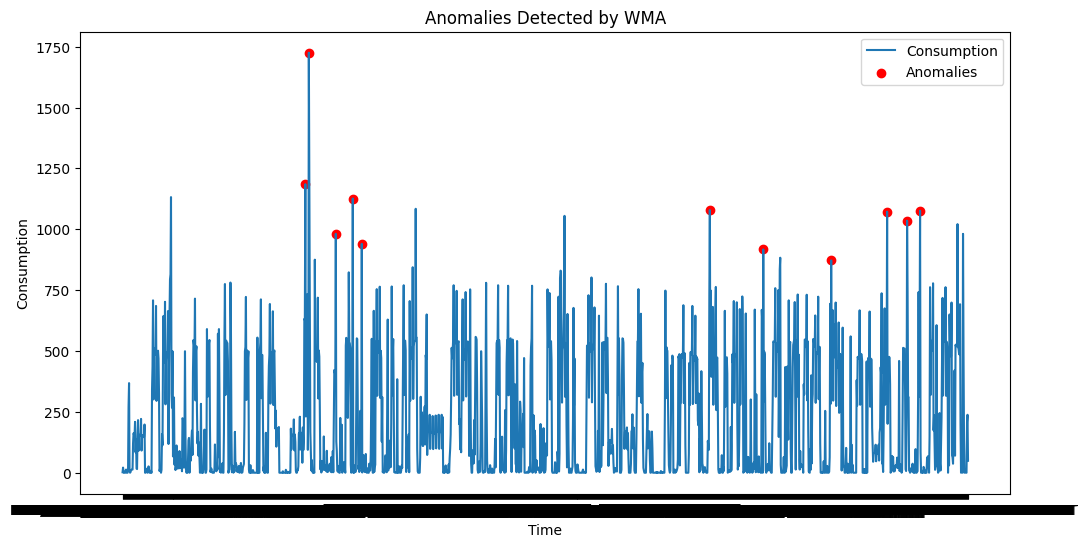

Precision: 0.9090909090909091
Recall: 0.625
F1 Score: 0.7407407407407406
Accuracy: 0.9958677685950413


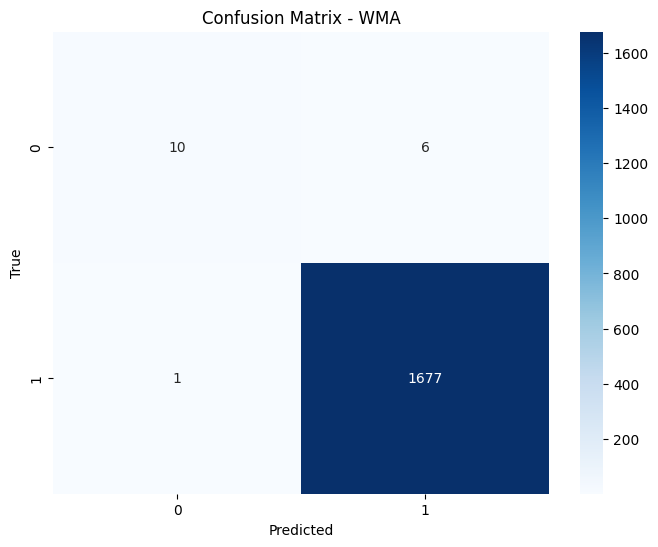

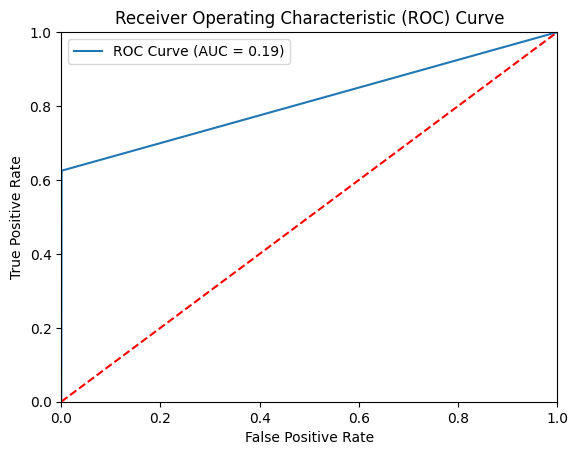

Confusion Matrix:
[[  10    6]
 [   1 1677]]


In [ ]:
# Set the window size for WMA = 20
window_size = 20

# Define the weights for WMA
weights = np.arange(1, window_size + 1)

# Calculate the Weighted Moving Average (WMA)
wma = df2['Consumption'].rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Calculate the deviation from the WMA
deviation = df2['Consumption'] - wma

# Calculate the threshold for anomaly detection
threshold = 3 * deviation.std()

# Update the 'Status' column based on the threshold
df2.loc[deviation.abs() > threshold, 'Status_pred'] = 'Anomaly'
df2.loc[deviation.abs() <= threshold, 'Status_pred'] = 'Normal'

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df2['created_on'], df2['Consumption'], label='Consumption')
plt.scatter(df2[df2['Status_pred'] == 'Anomaly']['created_on'], df2[df2['Status_pred'] == 'Anomaly']['Consumption'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Anomalies Detected by WMA')
plt.legend()
plt.show()

# Create the target labels and predicted labels arrays
y_true = df3['Status']
y_pred = df2['Status_pred']

# Calculate precision
precision = precision_score(y_true, y_pred, pos_label='Anomaly')

# Calculate recall
recall = recall_score(y_true, y_pred, pos_label='Anomaly')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, pos_label='Anomaly')

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Calculate the confusion matrix for WMA using df3 and df2
wma_confusion_matrix = confusion_matrix(df3['Status'], df2['Status_pred'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wma_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - WMA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for WMA
y_pred_proba = np.where(df2['Status_pred'] == 'Anomaly', 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(df3['Status'], y_pred_proba, pos_label='Anomaly')

# Calculate the Area Under the ROC Curve (AUC)
auc = roc_auc_score(df3['Status'], y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for WMA using df3 and df2
wma_confusion_matrix = confusion_matrix(df3['Status'], df2['Status_pred'])

# Print the confusion matrix
print("Confusion Matrix:")
print(wma_confusion_matrix)
